In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import SPCE_ParallelGP as SPCE
import time

config_file_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/config/config_TEST2_SDOF_SBAGM_6.json"

save_dir = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/TrainResult/"
Model = SPCE.StochasticPCE(config_file_path, numDOE= None)
Model.Read_result(save_dir,"SPCE_Result_0424013224_Z.json",show_info_= True)


-------------------------------------------------------------------------------
Initialized SPCE successfully
     Using Stochastic PCE solver
     Input X with shape (N,num_Vars): (500, 6)
     Input Y with shape (N,1)       : (0,)
     WARNING, No realization will be inputed when initialize the clase 
           Please use method: InputRealization() to initialize realization Y
 
     Config information: 
   {
    "X_path": "C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/TEST2_X_SBAGM_V6_VAL_DOE_500_DIR_Z_SPLIT.mat",
    "X_type": {
        "x1": "Gaussian",
        "x2": "Uniform",
        "x3": "Uniform",
        "x4": "Gaussian",
        "x5": "Gaussian",
        "x6": "Gaussian"
    },
    "OrthPolyParams": {},
    "Z_type": [
        "Gaussian"
    ],
    "Solver": "HybridLAR",
    "max_poly_degree": 4,
    "q_norm": [
        0.5,
        0.75,
        1
    ],
    "save_result_path": "C:/Users/v196m/Desktop/master_project/Masterarbeit/StochasticPCE"
}


RAND CASE

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################


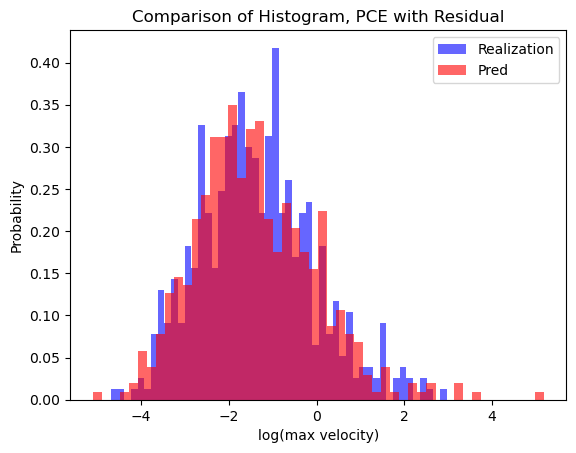

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################
-------------------------------------------------------------------------------
Start Compute Wassersein distance.
Quadratic Wasserstein distance: 0.017398214645658536
Wasserstein distance: 0.05760843217055893
-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted dat

In [17]:
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_RAND_DOE_1000_DIR_Z.mat"
Y = sio.loadmat(Y_path)
Input_sets = np.hstack((Model.X_train, np.array([Y["Y"]])[0]))


X_pred, Y_pred = Model.Predict_SPCE(load_type = "mat_file",Predict_type = "all_X", input_X = Model.X_path)
Pred_sets = np.hstack((X_pred, Y_pred.reshape((500, 1))))

# Plot the histogram
plt.hist(np.array([Y["Y"]])[0].flatten(), bins=50, density=True, alpha=0.6, color='b',label = 'Realization')
plt.hist(Y_pred.flatten(), bins=50, density=True, alpha=0.6, color='r',label = 'Pred')
plt.xlabel('log(max velocity)')
plt.ylabel('Probability')
plt.title('Comparison of Histogram, PCE with Residual')
plt.legend()
plt.show()#


error_1_list = []
error_2_list = []
num_repeat = 30
for i in range(0,num_repeat):
    #Model.Read_result(save_dir,"SPCE_Result_DATA100_1.json",show_info_= True)
    X_pred, Y_pred = Model.Predict_SPCE(load_type = "mat_file",Predict_type = "all_X", input_X = Model.X_path)
    error_1, error_2 = Model.ComputeERROR_WD(Y_pred, np.array([Y["Y"]])[0])
    error_2_list.append(error_2)

print(np.mean(error_2_list),np.std(error_2_list))

sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_RAND.mat", {'Y': Input_sets})
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Pred_sets_RAND.mat", {'Y': Pred_sets})


FIX POINT 1

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################


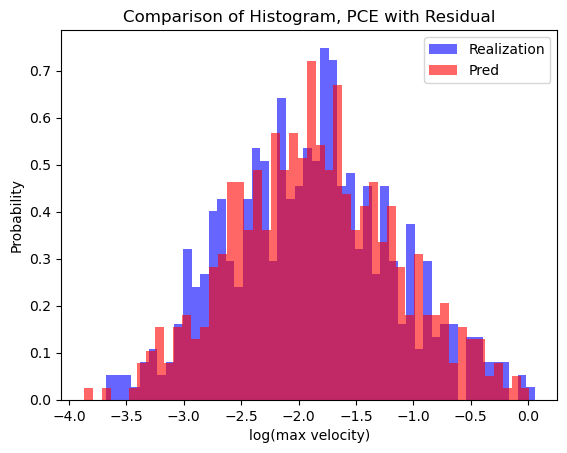

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################
-------------------------------------------------------------------------------
Start Compute Wassersein distance.
Quadratic Wasserstein distance: 0.005261050339496295
Wasserstein distance: 0.0391659758201167
-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data

In [18]:
# Other validation points 
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_FIX550_DOE_1000_DIR_Z.mat"
Y = sio.loadmat(Y_path)
Input_sets = np.hstack((Model.X_train, np.array([Y["Y"]])[0]))
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_1.mat", {'Y': Input_sets})

# Validation 
valid = Model.X_train[49,:]
a = np.zeros((500,6))
vary_params = np.zeros((500,))

a[:,0] = valid[0]
a[:,1] = valid[1]
a[:,2] = valid[2]
a[:,3] = valid[3]
a[:,4] = valid[4]
a[:,5] = valid[5]

X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
Pred_sets = np.hstack((X_pred, Y_pred.reshape((500, 1))))
plt.hist(np.array([Y["Y"]])[0].flatten(), bins=50, density=True, alpha=0.6, color='b',label = 'Realization')
plt.hist(Y_pred.flatten(), bins=50, density=True, alpha=0.6, color='r',label = 'Pred')
plt.xlabel('log(max velocity)')
plt.ylabel('Probability')
plt.title('Comparison of Histogram, PCE with Residual')
plt.legend()
plt.show()#

error_1_list = []
error_2_list = []
num_repeat = 30
for i in range(0,num_repeat):
    #Model.Read_result(save_dir,"SPCE_Result_DATA100_1.json",show_info_= True)
    X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
    error_1, error_2 = Model.ComputeERROR_WD(Y_pred, np.array([Y["Y"]])[0])
    error_2_list.append(error_2)

print(np.mean(error_2_list),np.std(error_2_list))

sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_1.mat", {'Y': Input_sets})
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Pred_sets_1.mat", {'Y': Pred_sets})

FIX POINT 2

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################


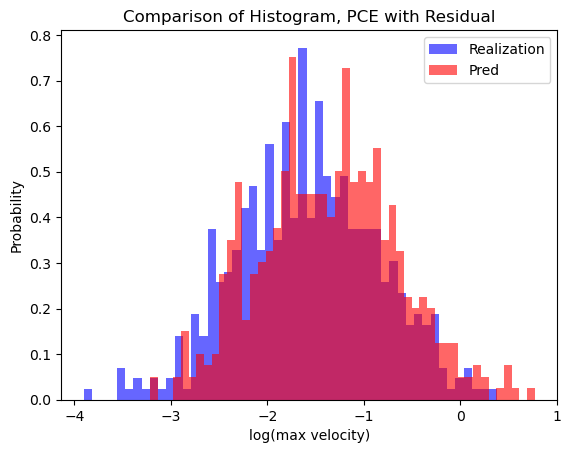

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################
-------------------------------------------------------------------------------
Start Compute Wassersein distance.
Quadratic Wasserstein distance: 0.10324443594966579
Wasserstein distance: 0.22868330571167744
-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data

In [2]:
# Other validation points 
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_FIX650_DOE_1000_DIR_Z.mat"
Y = sio.loadmat(Y_path)
Input_sets = np.hstack((Model.X_train, np.array([Y["Y"]])[0]))
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_2.mat", {'Y': Input_sets})

# Validation 
valid = Model.X_train[149,:]
a = np.zeros((500,6))
vary_params = np.zeros((500,))

a[:,0] = valid[0]
a[:,1] = valid[1]
a[:,2] = valid[2]
a[:,3] = valid[3]
a[:,4] = valid[4]
a[:,5] = valid[5]

X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
Pred_sets = np.hstack((X_pred, Y_pred.reshape((500, 1))))
plt.hist(np.array([Y["Y"]])[0].flatten(), bins=50, density=True, alpha=0.6, color='b',label = 'Realization')
plt.hist(Y_pred.flatten(), bins=50, density=True, alpha=0.6, color='r',label = 'Pred')
plt.xlabel('log(max velocity)')
plt.ylabel('Probability')
plt.title('Comparison of Histogram, PCE with Residual')
plt.legend()
plt.show()#

error_1_list = []
error_2_list = []
num_repeat = 30
for i in range(0,num_repeat):
    #Model.Read_result(save_dir,"SPCE_Result_DATA100_1.json",show_info_= True)
    X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
    error_1, error_2 = Model.ComputeERROR_WD(Y_pred, np.array([Y["Y"]])[0])
    error_2_list.append(error_2)

print(np.mean(error_2_list),np.std(error_2_list))

sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_2.mat", {'Y': Input_sets})
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Pred_sets_2.mat", {'Y': Pred_sets})

FIX POINT 3

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################


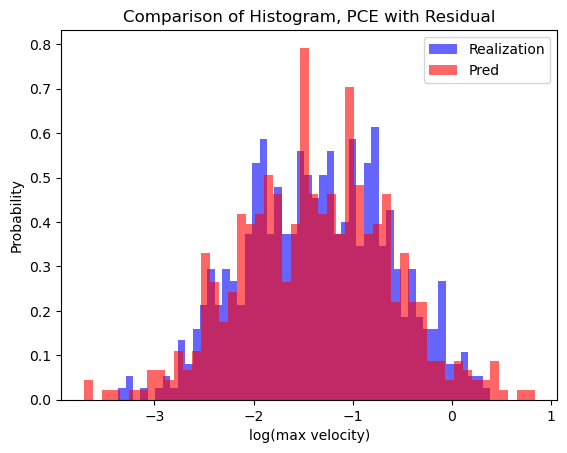

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################
-------------------------------------------------------------------------------
Start Compute Wassersein distance.
Quadratic Wasserstein distance: 0.010155818798770411
Wasserstein distance: 0.042623900261487796
-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted da

In [21]:
# Other validation points 
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_FIX750_DOE_1000_DIR_Z.mat"
Y = sio.loadmat(Y_path)
Input_sets = np.hstack((Model.X_train, np.array([Y["Y"]])[0]))
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_2.mat", {'Y': Input_sets})

# Validation 
valid = Model.X_train[249,:]
a = np.zeros((500,6))
vary_params = np.zeros((500,))

a[:,0] = valid[0]
a[:,1] = valid[1]
a[:,2] = valid[2]
a[:,3] = valid[3]
a[:,4] = valid[4]
a[:,5] = valid[5]

X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
Pred_sets = np.hstack((X_pred, Y_pred.reshape((500, 1))))
plt.hist(np.array([Y["Y"]])[0].flatten(), bins=50, density=True, alpha=0.6, color='b',label = 'Realization')
plt.hist(Y_pred.flatten(), bins=50, density=True, alpha=0.6, color='r',label = 'Pred')
plt.xlabel('log(max velocity)')
plt.ylabel('Probability')
plt.title('Comparison of Histogram, PCE with Residual')
plt.legend()
plt.show()#


error_1_list = []
error_2_list = []
num_repeat = 30
for i in range(0,num_repeat):
    #Model.Read_result(save_dir,"SPCE_Result_DATA100_1.json",show_info_= True)
    X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
    error_1, error_2 = Model.ComputeERROR_WD(Y_pred, np.array([Y["Y"]])[0])
    error_2_list.append(error_2)

print(np.mean(error_2_list),np.std(error_2_list))


sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_3.mat", {'Y': Input_sets})
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Pred_sets_3.mat", {'Y': Pred_sets})

FIX POINT 4

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################


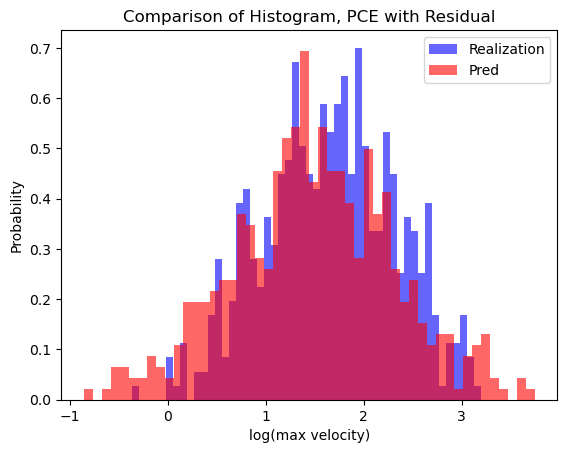

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################
-------------------------------------------------------------------------------
Start Compute Wassersein distance.
Quadratic Wasserstein distance: 0.10093916369251223
Wasserstein distance: 0.16812522471533034
-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data

In [22]:
# Other validation points 
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_FIX850_DOE_1000_DIR_Z.mat"
Y = sio.loadmat(Y_path)
Input_sets = np.hstack((Model.X_train, np.array([Y["Y"]])[0]))
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_2.mat", {'Y': Input_sets})

# Validation 
valid = Model.X_train[349,:]
a = np.zeros((500,6))
vary_params = np.zeros((500,))

a[:,0] = valid[0]
a[:,1] = valid[1]
a[:,2] = valid[2]
a[:,3] = valid[3]
a[:,4] = valid[4]
a[:,5] = valid[5]

X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
Pred_sets = np.hstack((X_pred, Y_pred.reshape((500, 1))))
plt.hist(np.array([Y["Y"]])[0].flatten(), bins=50, density=True, alpha=0.6, color='b',label = 'Realization')
plt.hist(Y_pred.flatten(), bins=50, density=True, alpha=0.6, color='r',label = 'Pred')
plt.xlabel('log(max velocity)')
plt.ylabel('Probability')
plt.title('Comparison of Histogram, PCE with Residual')
plt.legend()
plt.show()#

error_1_list = []
error_2_list = []
num_repeat = 30
for i in range(0,num_repeat):
    #Model.Read_result(save_dir,"SPCE_Result_DATA100_1.json",show_info_= True)
    X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
    error_1, error_2 = Model.ComputeERROR_WD(Y_pred, np.array([Y["Y"]])[0])
    error_2_list.append(error_2)

print(np.mean(error_2_list),np.std(error_2_list))

sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_4.mat", {'Y': Input_sets})
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Pred_sets_4.mat", {'Y': Pred_sets})

FIX POINT 5

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################


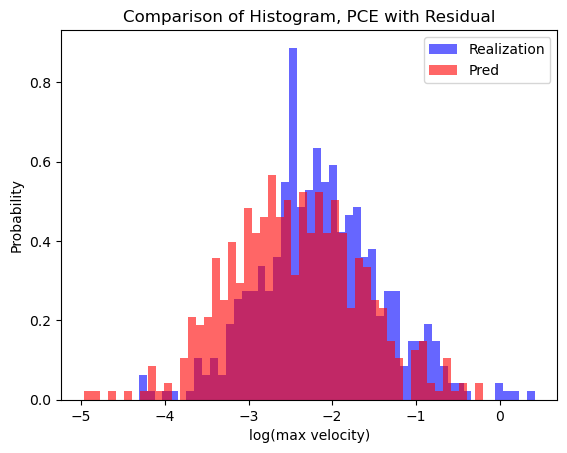

In [13]:
# Other validation points 
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_FIX950_DOE_1000_DIR_Z.mat"
Y = sio.loadmat(Y_path)
Input_sets = np.hstack((Model.X_train, np.array([Y["Y"]])[0]))
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_2.mat", {'Y': Input_sets})

# Validation 
valid = Model.X_train[449,:]
a = np.zeros((500,6))
vary_params = np.zeros((500,))

a[:,0] = valid[0]
a[:,1] = valid[1]
a[:,2] = valid[2]
a[:,3] = valid[3]
a[:,4] = valid[4]
a[:,5] = valid[5]

X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
Pred_sets = np.hstack((X_pred, Y_pred.reshape((500, 1))))
plt.hist(np.array([Y["Y"]])[0].flatten(), bins=50, density=True, alpha=0.6, color='b',label = 'Realization')
plt.hist(Y_pred.flatten(), bins=50, density=True, alpha=0.6, color='r',label = 'Pred')
plt.xlabel('log(max velocity)')
plt.ylabel('Probability')
plt.title('Comparison of Histogram, PCE with Residual')
plt.legend()
plt.show()#

sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets_5.mat", {'Y': Input_sets})
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Pred_sets_5.mat", {'Y': Pred_sets})